In [2]:
%pylab inline
import numpy as np 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Information Theory

일단 [information theory](http://sites.google.com/site/parthochoudhury/aMToC_CShannon.pdf)의 핵심 이론은 다음과 같습니다.

> **잘 일어나지 않는 사건 (unlinkely event)의 정보는 자주 발생할만한 사건보다 정보량이 많다(informative)**

더 쉽게 이해하면 **불확실성 정도의 측정** 이라고 이해하면 됩니다.<br>

* [유튜브 영상](https://youtu.be/9r7FIXEAGvs) 참고
* [Shannon Entropy, Information Gain, and Picking Balls from Buckets](https://medium.com/udacity/shannon-entropy-information-gain-and-picking-balls-from-buckets-5810d35d54b4)

보통 entropy는 열역학 그리고 통계학에서 두 가지 관점으로 정의를 내리고 설명을 하는데, <br>
해당 문서에서는 통계학적 관점에서의 entropy를 정의 내리고, Decision Tree를 설명하겠습니다.

## Entropy

확률에 대한 entropy공식은 다음과 같습니다. 

$$ H(p) = - \log_b(p) $$

* $ p $ : 는 어떤 이벤트가 일어날 확률
* $ b $ : base 
  * base 2 : bits (보통은 base 2 가 사용됩니다.)
  * base 3 : trits
  * base 10 : Hartleys
  * base e : nats


Entropy는 **불확실성 (Unpredictability)**을 나타냅니다.

## Red and Blue Balls Example

예를 들어서 3개의 상자안에 빨간공 그리고 파란공이 상자당 4개씩 일렬로 들어 있습니다. <br>
게임의 룰은 동일한 순서로 공을 꺼내게 되면 이기는 룰이며, 꺼낸 공은 다시 상자에 집어 넣습니다. <br>
따라서 다음 공을 꺼낼때의 확률은 이전과 동일 합니다.

![Ball](images/entropy_ball.png)


Entropy는 불확실 정도를 나타내는 값이니, 첫번째 상자는 entropy가 낮고, 세번째 상자로 갈수록 entropy는 높아져야 합니다.<br>
즉 이길 확률과는 반대이며, log를 사용하면 반대로 나타내줄 수 있습니다. 

**이때 기계학습에서 매우 중요한 포인트가 있습니다!!**

$$ \log(ab) = \log(a) + \log(b) $$

확률의 곱을 계산한 뒤에 나중에 log를 연산하는게 아니라, 각각의 확률마다 log를 연산뒤 합산하는게 좋습니다.<br>
수학적으로 같은 결과를 내지만, 특히 연산량이 많은 기계학습, 딥러닝에서 곱셈을 하는 것은 합산보다 연산량이 많기 때문에, 오른쪽 부등식처럼 바꿔서 연산을 합니다. (곱셈/나눗셈은 연산에 있어서 합/뺄셈을 반복적으로 사용해서 연산을 하게 됩니다. 덧셈/뺄셈: 1 cycle, 곱셈: 10 cycles, 나눗셈: 66-80 cycles [인텔 문서 참고](https://www.intel.com/content/dam/www/public/us/en/documents/manuals/64-ia-32-architectures-optimization-manual.pdf))

> Logistic regression에서 likehood 계산을 log-likelihood로 바꿔서 계산하는 것과 같은 원리 입니다

entropy를 적용하여 계산하면 다음과 같습니다.

* RRRR -> $ -\log(1) -\log(1) -\log(1) -\log(1) = 0 $
* RRRB -> $ -\log(0.75) -\log(0.75) -\log(0.75) -\log(0.25) = 3.245 $
* RRBB -> $ -\log(0.5) -\log(0.5) -\log(0.5) -\log(0.5) = 4 $

![Ball](images/entropy_ball2.png)

##  Bits Example


스무고개를 한다고 가정을 합니다. 0에서부터 1023까지의 숫자중에서 제가 생각하고 있는 숫자 한개를 맞춰보라고 했을때.. 당신의 첫번째 질문은 무엇일까요?

예를 들어, "132입니까?" 라고 물어볼수도 있고, "0에서 100사이의 숫자입니까?" 라고 물어볼수도 있을 것입니다. <br>
하지만 "0에서 511사이의 숫자입니까?"처럼 남아있는 옵션을 절반으로 줄이는 질문이 좋은 질문일 것 입니다. <br>
위의 질문의 경우 {0, ..., 511} 그리고 {512, ..., 1023} 으로 나누며, 어떤 선택을 하든지, 512개의 가능한 값들이 **둘로** 나뉘게 됩니다.

Information Theory에서는 512처럼 남아있는 값을 일종의 **정보**로 보며, entropy라는 컨셉으로 이해를 하게 됩니다.<br>
Entropy는 아주 쉽게 이해했을때, **남아있는 정보의 양**으로 생각하면 쉬우며, 복잡하면 복잡할수록 entropy는 높아지고, 쉽고 명료하다면.. entropy의 양은 줄어들 것 입니다.

숫자로 이해를 해보고자 한다면, 1024를 1빼줘서 bits를 구합니다. (bits로 표현시 0에서부터 시작했을때 0~1023은 1024개와 동일합니다.) 
bits(1023)의 경우 `1111111111`  bit로 표현 될 수 있으며, 10자리의 bits로 구성되어 있기 때문에, 최대 10번의 질문을 해야지만 찾고자 하는 답을 얻을 수가 있게 된다는 뜻이 됩니다. (4는 `bits(3) = 11` 로서 2번 질문이 필요하고, 7의 경우 `bits(6) = 110` 으로서 3번의 질문이 필요합니다.).
다시말하자면, $ \log_2 $ 로 표현이 가능합니다.

| Information | function   | bits       | log_2            | N questions   |
|:------------|:-----------|:-----------|:-----------------|:--------------|
| 1024        | bits(1023) | 1111111111 | $ \log_2 $ 1024 | 10 번 질문 필요 | 
| 512         | bits(511)  | 111111111  | $ \log_2 $ 512  | 9 번 질문 필요  | 
| 256         | bits(255)  | 11111111   | $ \log_2 $ 256  | 8 번 질문 필요  |
| 128         | bits(127)  | 1111111    | $ \log_2 $ 128  | 7 번 질문 필요  |
| 64          | bits(63)   | 111111     | $ \log_2 $ 64   | 6 번 질문 필요  |
| 32          | bits(31)   | 11111      | $ \log_2 $ 32   | 5 번 질문 필요  |
| 16          | bits(15)   | 1111       | $ \log_2 $ 16   | 4 번 질문 필요  |
| 8           | bits(7)    | 111        | $ \log_2 $ 8    | 3 번 질문 필요  |
| 4           | bits(3)    | 11         | $ \log_2 $ 4    | 2 번 질문 필요  |
| 2           | bits(1)    | 1          | $ \log_2 $ 2    | 1 번 질문 필요  |


> 물론 0에서 1023의 숫자중에서 첫번째 질문을 `60인가요?`라고 물어봐서 한방에 맞춰버릴수도 있습니다.<br>
> 하지만 이경우 남아있는 정보량을 1023개로 만듬으로서 $ \log_2(1023) = 9.998 $ 로서 질문을 해야 할 횟수를 늘려버리게 됩니다.

결론적으로 Information이란 **우리가 알아내려는 답을 알기까지 필요한 정보의 양 또는 불확실성**이라고 볼 수 있습니다. <br>
예를 들어서 최초 1024에서 답을 알아낼때까지 필요한 정보는 $ \log_2(1024) = 10 $ 이며, <br>
만약 "답이 23인가요?" 처럼 한개를 물어봤을때는 $ \log_2(1023) = 9.99859 $ 가 됩니다. ( $ 1024-1 = 1023 $ )<br>
1~512이 사이의 숫자인가요? 라고 묻게 될 경우 $ \log_2(512) = 9 $ 가 되게 됩니다.

# Multi-Class Entropy 

위에서 2개의 classes가 존재한다는 가정하에서 설명을 했습니다.<br>
여기에서부터는 선택지가 다수인 entropy 방법을 설명하겠습니다. 


### $$ I_H(t) = -\sum^c_{i=1} p_i log_2 p_i $$

$ p_i = p(i|t) $ 로서 특정 노드의 클래스 비율을 뜻함. 

| Symbol | Description |
|:-------|:------------|
| $ p(i\ |\ t) $ | 특정 노드 t에서 클래스 c에 속하는 샘플들의 비율(proportion) |

모든 샘플들이 동일한 하나의 class로 분류된다면, entropy의 값은 0이 되며, <br>
entropy갑싱 uniform class distribution (쉽게 말해.. 고르게 분산)을 갖었다면, maximum value(1)을 갖게 됩니다.

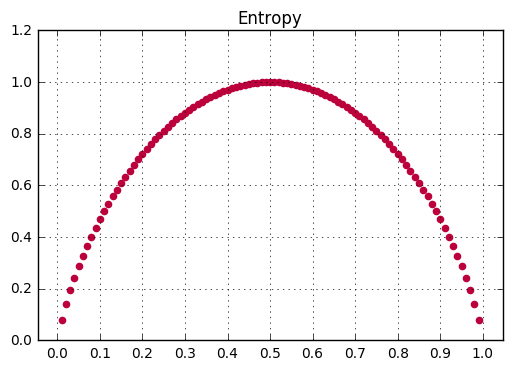

In [25]:
def entropy(p):
    return -(p*np.log2(p) + (1-p)*np.log2(1-p))

x = np.arange(0.01, 1, 0.01)
y = entropy(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Entropy')
scatter(x, y, color='#BB003C')

# Information Gain

Decision Tree에서 **maximize**해야될 objective function 으로서 

### $$ IG(D_p, f) = I(D_p) - \sum^c_{j=1} \frac{N_j}{N_p} I(D_j) $$

* $ IG(D_p, f) $ : Information Gain 함수로서 maximize해야 됨 
* $ D_p $ : 부모 노드의 Dataset 
* $ D_j $ : 자식 노드의 Dataset 
* $ f $ : 나누려는 feature 
* $ I $ : Impurity measure  
* $ N_p $ : 부모노드의 전체 샘플 갯수 
* $ N_j $ : 자식노드의 전체 샘플 갯수 

위의 공식에서 보듯이, Information Gain이란 *(부모 노드의 Impurity)*와 *(자식노드 Impurity의 합)*의 차이입니다. <br>
**자식노드의 impurity가 낮을수록, Information Gain의 값은 높아집니다.**

하지만 대부분 검색효율화를 위해서 Binary Decision Tree를 주로 사용합니다. (2개의 자식노드만을 갖음)<br>
공식은 다음과 같습니다.

### $$ IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{ N_{right}}{N_p} I(D_{right})  $$


# Gini Impurity

misclassification의 확률을 **Minimize**하는것이 목표<br>
$ p = p(i|t) $ 로서 특정 노드의 클래스 비율을 뜻함. 

### $$ I_G(t) = \sum^c_{i=1} p \cdot (1 - p_i) = 1 - \sum^c_{i=1} p_i^2 $$

Entropy와 동일하게, classes들이 완벽하게 섞였을때 (즉 binary class setting ... c=2 일때 proportion값은 0.5) 가장 높은(maximal)값이 나옵니다.

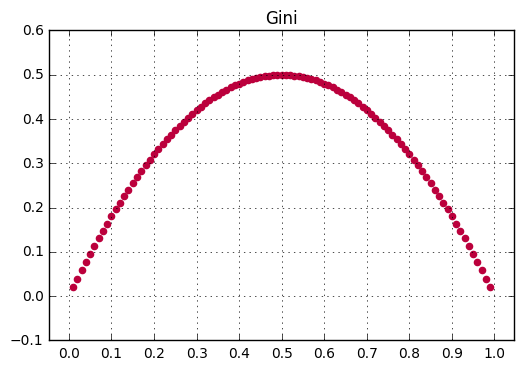

In [28]:
def gini(p):
    return 1 - (p**2 + (1-p)**2)

x = np.arange(0.01, 1, 0.01)
y = gini(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Gini')
scatter(x, y, color='#BB003C')

# Classification Error

실질적으로 위의 그래프에서처럼.. Gini Impurity 그리고 Entropy는 서로 유사한 형태의 그래프를 그리게 됩니다. <br>
다른 결과를 내놓는 impurity measure방법으로는 classification error가 있습니다.<br>
$ p_i = p(i|t) $ 라는 조건하에.. 

$$ I_E(t) = 1 - max\left( p_i \right) $$

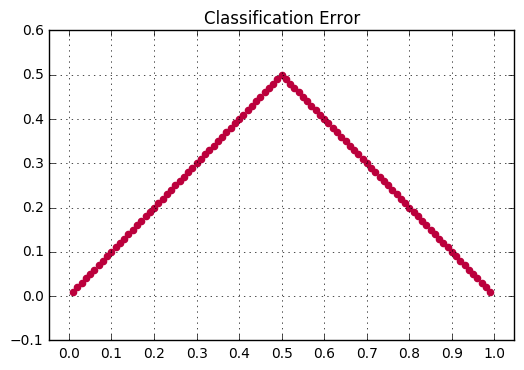

In [24]:
def error(p):
    return 1 - np.max([p, 1-p], axis=0)

x = np.arange(0.01, 1, 0.01)
y = error(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Classification Error')
scatter(x, y, color='#BB003C')

In [6]:
tennis = pd.read_csv('tennis.csv')
display(tennis)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes
